### Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its application.



#### <b><u>Min-max normalization

Min-max normalization is a simple technique that rescales the data values to a range between 0 and 1, using the minimum and maximum values of the original data. 

#### <b><u>How is it used in data preprocessing?
    
This technique preserves the relative order and distance of the data points, but it also reduces the variance and magnifies the effect of outliers. Min-max normalization is useful when the data has a fixed range, such as grades or percentages, but it can distort the data if there are extreme values or different scales.


In [25]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# initializing the scale

scaler = MinMaxScaler()

df_iris = sns.load_dataset('iris')

df_iris.head()

normalized_df = pd.DataFrame(scaler.fit_transform(df_iris[['sepal_length', 'petal_length']]), columns=['nor_sepal', 'nor_petal'])


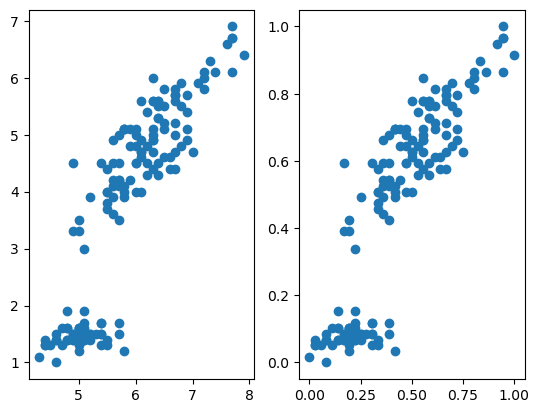

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplot(1,2,1)
plt.scatter(df_iris['sepal_length'], df_iris['petal_length'])
plt.subplot(1,2,2)
plt.scatter(normalized_df['nor_sepal'], normalized_df['nor_petal'])
plt.show()

First plot: Original Dada

Second Plot: Normalized data by Min-Max Scaler

Comaparing both, you can see the distribution has not changed but in the 2nd plot, scale changed and it ranges between 0 to 1.


ML algorithms are sensitive to the ‘relative scales of features’, which occur when using the numeric values of features rather than their rank. Machine learning algorithms may assume that larger values have more significance. 

So, now with the normalized data having common scale(0 to 1), Machine learning algorithms like linear and logistic regression, artificial neural networks, clustering algorithms with k value, will not be affected by the different scale of the data.

### Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling? Provide an example to illustrate its application.


#### <b><u>Unit Vector Scaling</u></b>

Unit vector scaling is done keeping in mind the whole feature vector in a unit length. This normally requires dividing each component by the Euclidean length of the vector. In certain applications, it can be practical to use the L1 norm of the feature vector.

Like min-max scaling, the unit vector technique will produce values that range between 0 and 1. It is useful when dealing with features with hard boundaries.

The unit vector scaler formula is:

$\hat{a} = \vec{a}/|a|$


<b><u>How does Unit vector Scaling differ from Min-Max scaling?

In Min-Max scaling, every datapoint is divided by the difference of Minimum value and Maximum Value. But, in Unit vector Scaling, datapoints divided by the magnitude of the vector of that particular datapoint.

In [36]:
import seaborn as sns
from sklearn.preprocessing import normalize
import pandas as pd


df_iris = sns.load_dataset('iris')


unit_df = pd.DataFrame(normalize(df_iris[['sepal_length', 'petal_length']]), columns=['unit_sepal', 'unit_petal'])


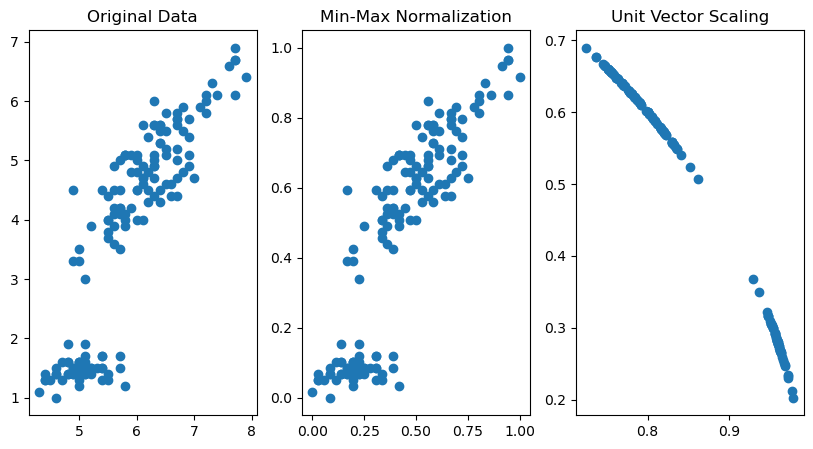

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title("Original Data")
plt.scatter(df_iris['sepal_length'], df_iris['petal_length'])
plt.subplot(1,3,2)
plt.title("Min-Max Normalization")
plt.scatter(normalized_df['nor_sepal'], normalized_df['nor_petal'])
plt.subplot(1,3,3)
plt.title("Unit Vector Scaling")
plt.scatter(unit_df['unit_sepal'], unit_df['unit_petal'])
plt.show()

### Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an example to illustrate its application.

#### <b><u>PCA</u></b>

<b>Principal Component Analysis (PCA)</b> is a statistical procedure that uses an orthogonal transformation that converts a set of correlated variables to a set of uncorrelated variables. PCA is the most widely used tool in exploratory data analysis and in machine learning for predictive models. The main goal of Principal Component Analysis (PCA) is to reduce the dimensionality of a dataset while preserving the most important patterns or relationships between the variables without any prior knowledge of the target variables. 


#### <b><u>How is it used in dimensionality reduction?</u></b>

* First, the covariance matrix ZᵀZ is a matrix that contains estimates of how every variable in Z relates to every other variable in Z. Understanding how one variable is associated with another is quite powerful.
    
* Second, eigenvalues and eigenvectors are important. Eigenvectors represent directions. Think of plotting your data on a multidimensional scatterplot. Then one can think of an individual eigenvector as a particular “direction” in your scatterplot of data. Eigenvalues represent magnitude, or importance. Bigger eigenvalues correlate with more important directions.
    
* Finally, we make an assumption that more variability in a particular direction correlates with explaining the behavior of the dependent variable. Lots of variability usually indicates signal, whereas little variability usually indicates noise. Thus, the more variability there is in a particular direction is, theoretically, indicative of something important we want to detect. (The setosa.io PCA applet is a great way to play around with data and convince yourself why it makes sense.)

* PCA combines all the above predictors and allows us to drop the eigenvectors that are relatively unimportant.


Source: https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

#### <b><u>STEP BY STEP ANALYSIS OF PCA WITH AN EXAMPLE</u></b>:


Let us consider the below dataset with the following features of dimensions as F1, F2, F3, and F4.

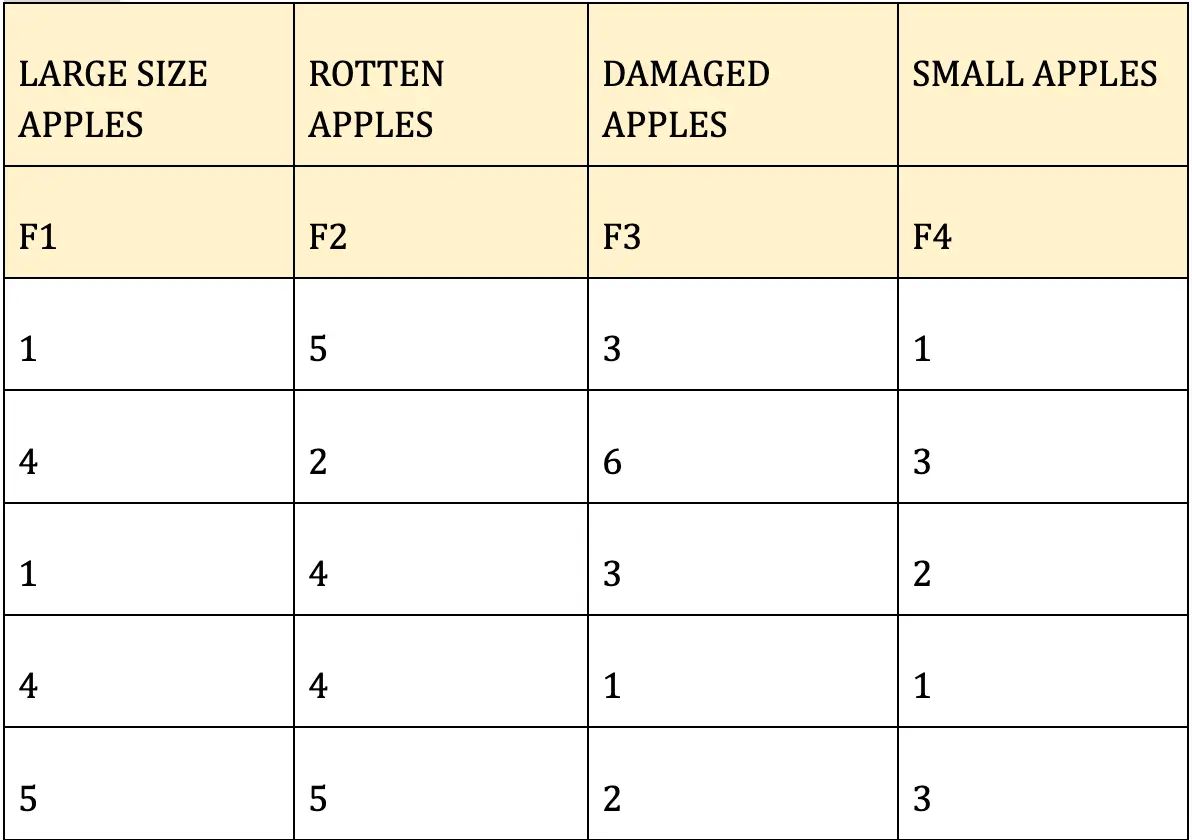

#### <b><u>STEP 1: STANDARDIZATION:</u></b>

The range of variables is calculated and standardized in this process to analyze the contribution of each variable equally.
Calculating the initial variables will help you categorize the variables that are dominating the other variables of small ranges.
This will help you attain biased results at the end of the analysis.

Calculate the Mean and Standard Deviation for each feature and then, tabulate the same as follows.

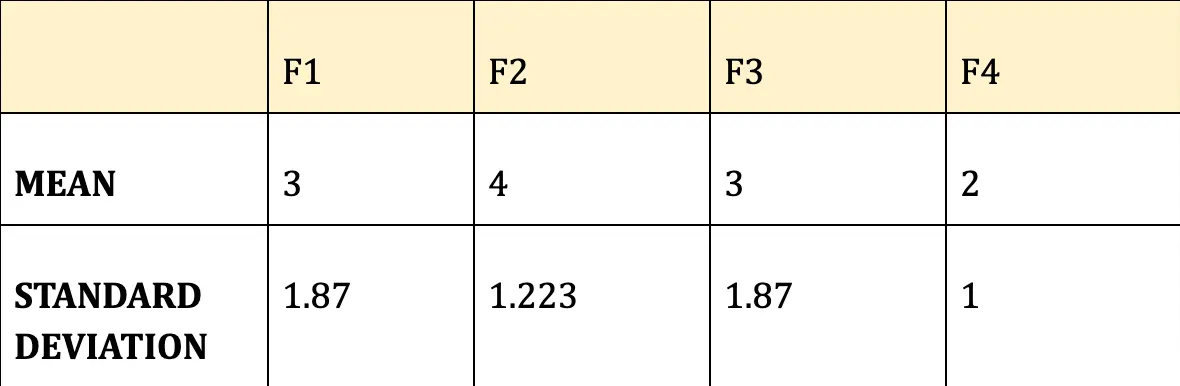


Then, after the Standardization of each variable, the results are tabulated below.


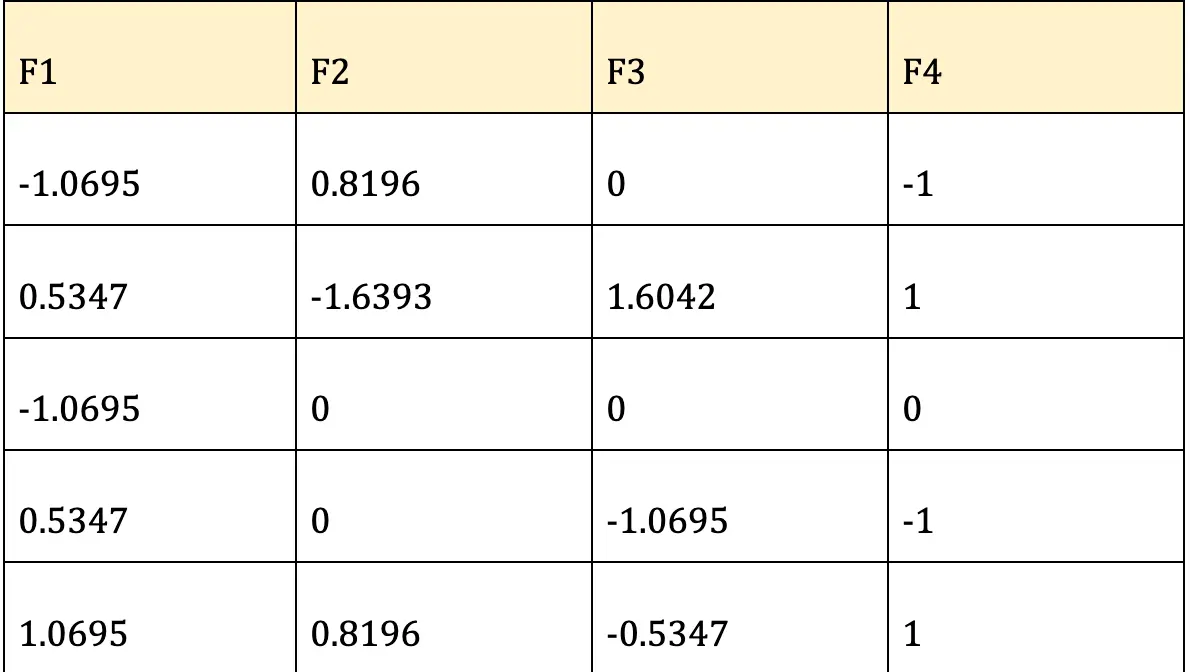

This is the Standardized data set.

#### <b><u>STEP 2: COVARIANCE MATRIX COMPUTATION</u></b>:

In this step, you will get to know how the variables of the given data are varying with the mean value calculated. Any interrelated variables can also be sorted out at the end of this step. To segregate the highly interrelated variables, you calculate the covariance matrix with the help of the given formula.


**Note: **A covariance matrix is a N x N symmetrical matrix that contains the covariances of all possible data sets.

So, continuing with the same example,


The covariance matrix of two-dimensional data is, given as follows:


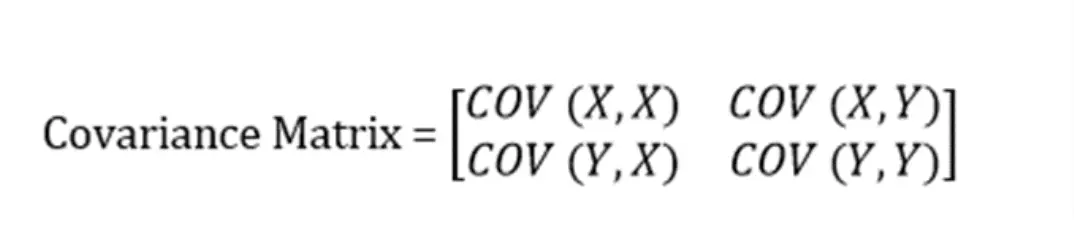


After applying the above formula into the given dataset, we get the below covariance matrix:


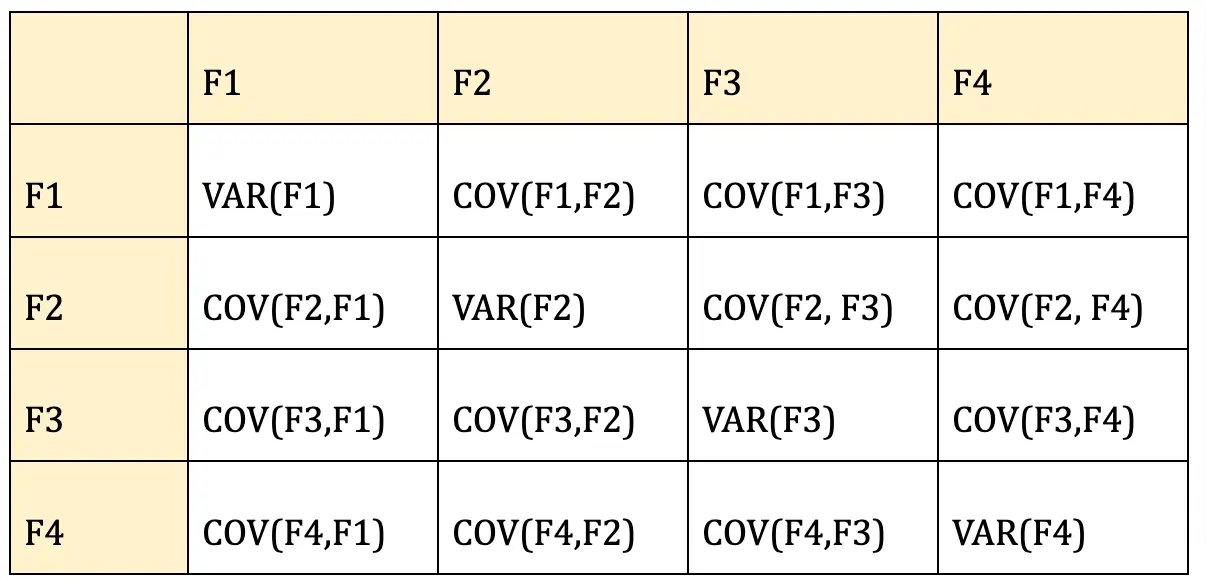


The formula to calculate Covarience is:

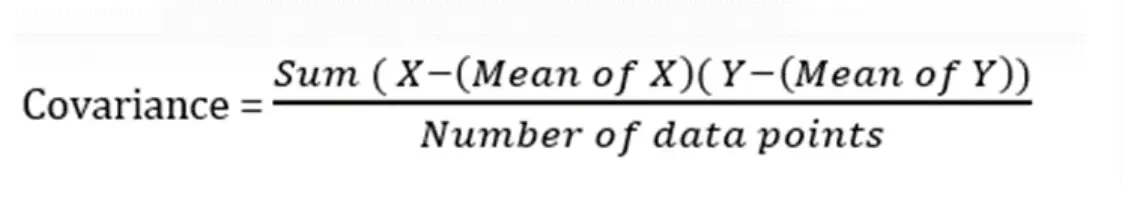


After applying the the formula of the covarience mentioned above to every element of the covarience matrix, we get the below:


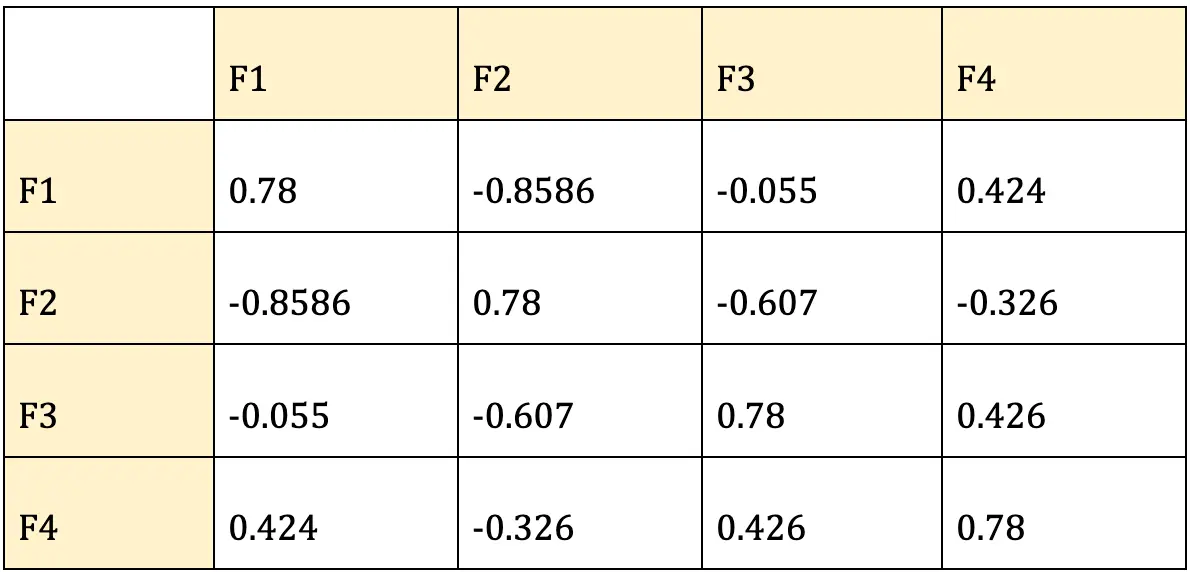


#### <b><u>STEP 3: FEATURE VECTOR</u></b>:

1. To determine the principal components of variables, you have to define eigen value and eigen vectors for the same. Let A be any square matrix. A non-zero vector v is an eigenvector of A if

> $Av = λv$, for some number λ, called the corresponding eigenvalue.

2. Once you have computed the eigen vector components, define eigen values in descending order ( for all variables) and now you will get a list of principal components.

3. So, the eigen values represent the principal components and these components represent the direction of data.

4. This indicates that if the line contains large variables of large variances, then there are many data points on the line. Thus, there is more information on the line too.

5. Finally, these principal components form a line of new axes for easier evaluation of data and also the differences between the observations can also be easily monitored.

Example:

Let ν be a non-zero vector and λ a scalar.

As per the rule,

$Aν = λν$, then λ is called eigenvalue associated with eigenvector ν of A.

Upon substituting the values in $det(A- λI) = 0$, you will get the following matrix.


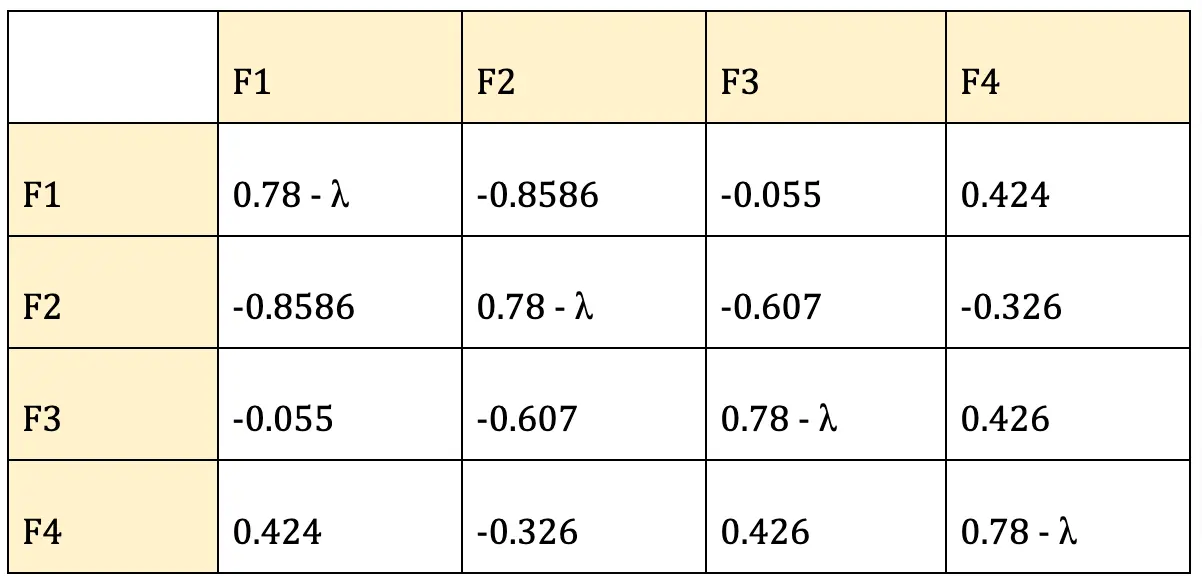


When you solve the following the matrix by considering 0 on right-hand side, you can define eigen values as

λ = 2.11691 , 0.855413 , 0.481689 , 0.334007

Then, substitute each eigen value in (A-λI)ν=0 equation and solve the same for different eigen vectors v1, v2, v3 and v4.

For instance,

For λ = 2.11691, solving the above equation using Cramer's rule, the values for the v vector are v1 = 0.515514 v2 = -0.616625 v3 = 0.399314 v4 = 0.441098

Follow the same process and you will form the following matrix by using the eigen vectors calculated as instructed.


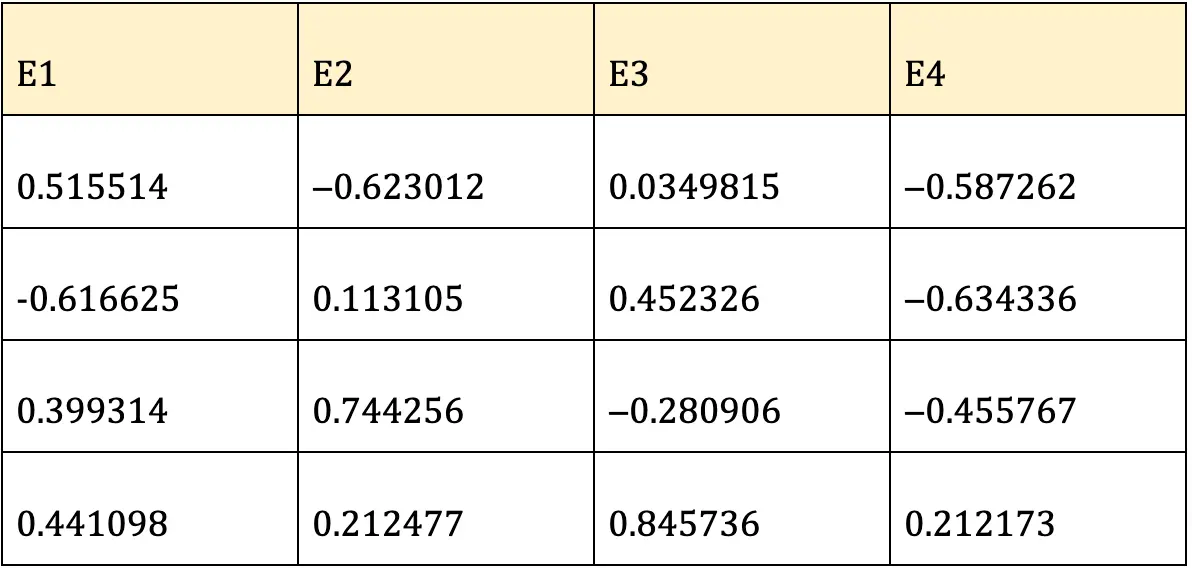


Now, calculate the sum of each Eigen column, arrange them in descending order and pick up the topmost Eigen values. These are your Principal components.


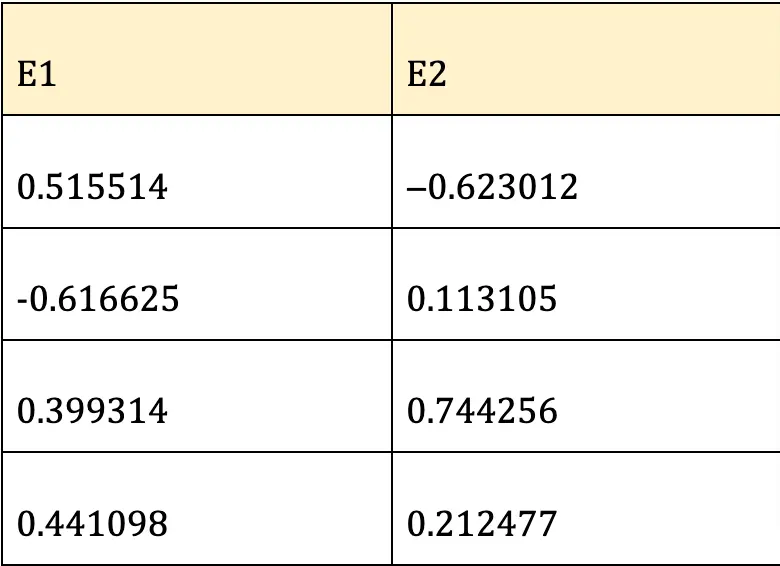


#### <b><u>STEP 4: RECAST THE DATA ALONG THE PRINCIPAL COMPONENTS AXES</u></b>:


* Still now, apart from standardization, you haven’t made any changes to the original data. You have just selected the Principal components and formed a feature vector. Yet, the initial data remains the same on their original axes.
    
* This step aims at the reorientation of data from their original axes to the ones you have calculated from the Principal components.


This can be done by the following formula.

$Final Data Set= Standardized Original Data Set * FeatureVector$

Example:

So, in our guide, the final data set becomes

Standardized Original Data Set =

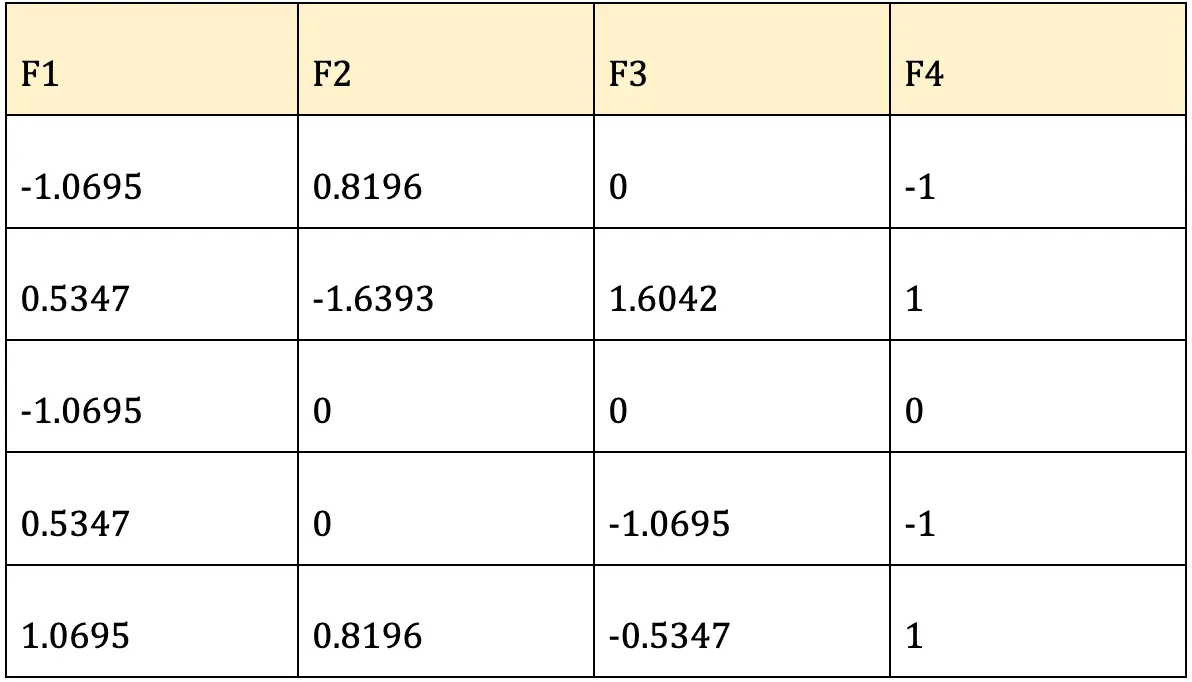


FeatureVector =


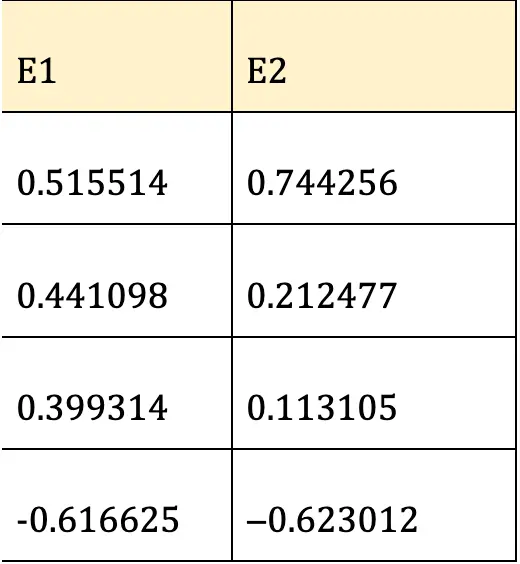


By solving the above equations, you will get the transformed data as follows.


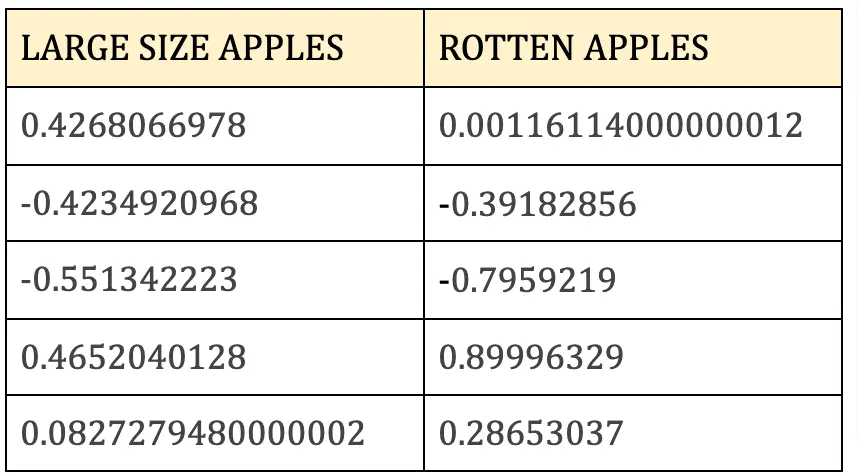

Did you notice something? Your large dataset is now compressed into a small dataset without any loss of data! This is the significance of Principal Component Analysis.



Source: https://www.turing.com/kb/guide-to-principal-component-analysis

### Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature Extraction? Provide an example to illustrate this concept.


Principal component analysis (PCA) is an unsupervised linear transformation technique which is primarily used for feature extraction and dimensionality reduction. 


* <b>Feature Extraction vs Dimentionality Reduction</b>:

> Feature extraction is a family of dimensionality reduction techniques where a new set of features is built from the original feature set, and we drop less important new features to keep important ones. In order to reduce dimensionality, the number of the new features is lower than the number of the original ones.

#### <b><u>How can PCA be used for Feature Extraction?</u></b> 

Consider you have a tabular data organized with n rows and likely p+1 columns, where one column corresponds to your dependent variable (usually denoted Y) and p columns where each corresponds to an independent variable (the matrix of which is usually denoted X).

Below is the process how PCA does feature extraction:

1. If a Y variable exists and is part of your data, then separate your data into Y and X, as defined above — we’ll mostly be working with X. (Note: if there exists no column for Y, that’s okay — skip to the next point!)
    
2. Take the matrix of independent variables X and, for each column, subtract the mean of that column from each entry. (This ensures that each column has a mean of zero.)
    
3. Decide whether or not to standardize. Given the columns of X, are features with higher variance more important than features with lower variance, or is the importance of features independent of the variance? (In this case, importance means how well that feature predicts Y.) If the importance of features is independent of the variance of the features, then divide each observation in a column by that column’s standard deviation. (This, combined with step 2, standardizes each column of X to make sure each column has mean zero and standard deviation 1.) Call the centered (and possibly standardized) matrix Z.
    
4. Take the matrix Z, transpose it, and multiply the transposed matrix by Z. (Writing this out mathematically, we would write this as ZᵀZ.) The resulting matrix is the covariance matrix of Z, up to a constant.
    
5. (This is probably the toughest step to follow — stick with me here.) Calculate the eigenvectors and their corresponding eigenvalues of ZᵀZ. This is quite easily done in most computing packages— in fact, the eigendecomposition of ZᵀZ is where we decompose ZᵀZ into PDP⁻¹, where P is the matrix of eigenvectors and D is the diagonal matrix with eigenvalues on the diagonal and values of zero everywhere else. The eigenvalues on the diagonal of D will be associated with the corresponding column in P — that is, the first element of D is λ₁ and the corresponding eigenvector is the first column of P. This holds for all elements in D and their corresponding eigenvectors in P. We will always be able to calculate PDP⁻¹ in this fashion. (Bonus: for those interested, we can always calculate PDP⁻¹ in this fashion because ZᵀZ is a symmetric, positive semidefinite matrix.)
    
6. Take the eigenvalues λ₁, λ₂, …, λp and sort them from largest to smallest. In doing so, sort the eigenvectors in P accordingly. (For example, if λ₂ is the largest eigenvalue, then take the second column of P and place it in the first column position.) Depending on the computing package, this may be done automatically. Call this sorted matrix of eigenvectors P*. (The columns of P* should be the same as the columns of P, but perhaps in a different order.) Note that these eigenvectors are independent of one another.
    
7. Calculate Z* = ZP*. This new matrix, Z*, is a centered/standardized version of X but now each observation is a combination of the original variables, where the weights are determined by the eigenvector. As a bonus, because our eigenvectors in P* are independent of one another, each column of Z* is also independent of one another!

8. Finally, we need to determine how many features to keep versus how many to drop. There are three common methods to determine this, discussed below and followed by an explicit example:

    * Method 1: We arbitrarily select how many dimensions we want to keep. Perhaps I want to visually represent things in two dimensions, so I may only keep two features. This is use-case dependent and there isn’t a hard-and-fast rule for how many features I should pick.
    
    * Method 2: Calculate the proportion of variance explained (briefly explained below) for each feature, pick a threshold, and add features until you hit that threshold. (For example, if you want to explain 80% of the total variability possibly explained by your model, add features with the largest explained proportion of variance until your proportion of variance explained hits or exceeds 80%.)
    
    * Method 3: This is closely related to Method 2. Calculate the proportion of variance explained for each feature, sort features by proportion of variance explained and plot the cumulative proportion of variance explained as you keep more features. (This plot is called a scree plot, shown below.) One can pick how many features to include by identifying the point where adding a new feature has a significant drop in variance explained relative to the previous feature, and choosing features up until that point. (I call this the “find the elbow” method, as looking at the “bend” or “elbow” in the scree plot determines where the biggest drop in proportion of variance explained occurs.)

<br>

Excelent PCA Source: https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

Visual Analysis: https://towardsdatascience.com/feature-extraction-using-principal-component-analysis-a-simplified-visual-demo-e5592ced100a

## Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to preprocess the data

1. from sklearn.preprocessing library, we will import MinMaxScaler

   * Code: from sklearn.preprocessing import MinMaxScaler
   
   And, Import pandas as pd.
   
   * Code: import pandas as pd

2. Define the MinMax Scaler.

   * Code: Scaler = MinMaxScaler()

3. Read the Dataset which contains data into a pandas dataframe.

   * Code: df_food_delivery = pd.read_csv("food_delivery_data.csv")
   
4. Fit the scaler using available training data using fit() function

   * Code: Scaler.fit(df_food_delivery[['price','rating','delivery time']])
   
5. Apply the scale to training data using transform() function:

   * Code: Scaler.transform(df_food_delivery[['price','rating','delivery time']])


## Q6. You are working on a project to build a model to predict stock prices. The dataset contains many features, such as company financial data and market trends. Explain how you would use PCA to reduce the dimensionality of the dataset.


1. Separate the target variable "stock price" from the rest of the dataset.

2. Standardize all the values in the dataset. Let's call the standardized dataset as X.

2. Find the covariance of the dataset or Matrix X. 

3. Calculate the eigenvectors and their corresponding eigenvalues of the covariance matrix X.

4. Sort the eigenvalues in largest to smallest manner. And, sort their corresponding eigenvectors accordingly.

5. Calculate X* = ZX*. This new matrix, X*, is a centered/standardized version of X but now each observation is a combination of the original variables, where the weights are determined by the eigenvector.

6. Finally, we can determine how many features to keep versus how many to drop by calculating the proportion of the the proportion of variance explained is the sum of the eigenvalues of the features you kept divided by the sum of the eigenvalues of all features.

## Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the values to a range of -1 to 1.


In [3]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

lst1 = [1, 5, 10, 15, 20]

# converting the list into 2d array. 

lst_2d = np.array(lst1).reshape(-1,1)

# setting the feature range as asked in the question

Scaler = MinMaxScaler(feature_range=(-1,1))

transformed_lst = Scaler.fit_transform(lst_2d)

print(transformed_lst)

[[-1.        ]
 [-0.57894737]
 [-0.05263158]
 [ 0.47368421]
 [ 1.        ]]


## Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform Feature Extraction using PCA. How many principal components would you choose to retain, and why?

1. Separate the target variable "stock price" from the rest of the dataset.

2. Standardize all the values in the dataset. Let's call the standardized dataset as X.

2. Find the covariance of the dataset or Matrix X. 

3. Calculate the eigenvectors and their corresponding eigenvalues of the covariance matrix X.

4. Sort the eigenvalues in largest to smallest manner. And, sort their corresponding eigenvectors accordingly.

5. Calculate X* = ZX*. This new matrix, X*, is a centered/standardized version of X but now each observation is a combination of the original variables, where the weights are determined by the eigenvector.

6. Finally, we can determine how many features to keep versus how many to drop by calculating the proportion of the the proportion of variance explained is the sum of the eigenvalues of the features you kept divided by the sum of the eigenvalues of all features.


* Generally we try to keep 3 to 5 features. In this case, we like to keep 3 features - three pricipal components with highest eigenvalues.